# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [121]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [122]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url =f"{base_url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=20023c24ba6fa76444d95a7c9bec5659&units=metric&q=


In [123]:
response = requests.get(query_url+"London")
pprint(response.json())

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1608043399,
 'id': 2643743,
 'main': {'feels_like': 8.12,
          'humidity': 76,
          'pressure': 1007,
          'temp': 11,
          'temp_max': 12,
          'temp_min': 10},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1608019209,
         'sunset': 1608047498,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 3.1}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
cities_data = []
counter = 0
for city in cities:
    counter = counter + 1
    response = requests.get(query_url+city).json()
    try:
        
        city = response["name"]
        temp_max = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        wind_speed = response["wind"]["speed"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        longitude = response["coord"]["lon"]
        latitude = response["coord"]["lat"]
        cities_data.append([city, temp_max, humidity, wind_speed,cloudiness,country,date, longitude,latitude])
        print(f'{counter} {city}')
        time.sleep(1)
    except:
        print("City not found")
    
    
    

City not found
City not found
3 Emba
City not found
5 Port Blair
6 Atuona
7 Bluff
8 Kathu
9 Karasjok
10 Pisco
11 Tapes
12 Butaritari
13 Albany
14 São Filipe
15 Touros
16 Portland
17 Naze
18 Ushuaia
19 Punta Arenas
20 Kazachinskoye
City not found
22 Rikitea
23 Coquimbo
24 Comodoro Rivadavia
25 Husavik
26 Hithadhoo
27 Ponta do Sol
28 Mar del Plata
29 Hamilton
30 Westport
31 Upernavik
32 Ikorodu
33 Juli
34 Nagyvenyim
35 George Town
City not found
37 Chokurdakh
38 Esperance
39 Lorengau
40 Qaanaaq
41 Torbay
42 Longyearbyen
43 Airai
44 Klaksvík
45 Chivay
46 Kudahuvadhoo
47 Jamestown
48 Moranbah
49 Fairbanks
50 Isverna
51 Makakilo City
52 Mahébourg
53 Barcelos
54 Castro
55 Mount Gambier
56 Arraial do Cabo
City not found
58 New Norfolk
City not found
60 Zhengjiatun
61 Barrow
62 Los Llanos de Aridane
63 Kavieng
64 Bredasdorp
65 Banepā
66 Tasiilaq
67 Wattegama
68 Taltal
69 Saýat
70 Vestmanna
71 Narsaq
72 Muroto-misakicho
73 Provideniya
74 Bilibino
75 Carnarvon
76 Mataura
77 Lagoa
City not found


In [147]:

cities_df = pd.DataFrame(cities_data, columns = ["city","temp_max", "humidity", "wind_speed","cloudiness","country",
                                                 "date", "longitude","latitude"])
cities_df.head()


,city,temp_max,humidity,wind_speed,cloudiness,country,date,longitude,latitude
0,Emba,-8.70,82,2.27,0,KZ,1608043532,58.14,48.83
1,Port Blair,27.20,84,4.60,100,IN,1608043389,92.75,11.67
2,Atuona,25.81,77,9.11,7,PF,1608043534,-139.03,-9.80
3,Bluff,13.89,85,1.79,68,NZ,1608043535,168.33,-46.60
4,Kathu,30.00,94,0.50,20,TH,1608043536,98.33,7.92


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [175]:

humidity_data = cities_df[cities_df["humidity"]>100].index
humidity_data

Int64Index([], dtype='int64')

In [171]:
#  Get the indices of cities that have humidity over 100%.
#none

In [176]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data = cities_df.drop(humidity_data,inplace = False)
clean_data

,city,temp_max,humidity,wind_speed,cloudiness,country,date,longitude,latitude
0,Emba,-8.70,82,2.27,0,KZ,1608043532,58.14,48.83
1,Port Blair,27.20,84,4.60,100,IN,1608043389,92.75,11.67
2,Atuona,25.81,77,9.11,7,PF,1608043534,-139.03,-9.80
3,Bluff,13.89,85,1.79,68,NZ,1608043535,168.33,-46.60
4,Kathu,30.00,94,0.50,20,TH,1608043536,98.33,7.92
...,...,...,...,...,...,...,...,...,...
537,Pauini,29.71,60,1.17,100,BR,1608044063,-66.98,-7.71
538,Reserva,23.18,76,2.53,84,BR,1608044124,-50.85,-24.65
539,Province of Mantua,8.33,93,1.34,100,IT,1608044125,10.78,45.17
540,Kokoda,24.34,73,0.29,97,PG,1608044126,147.74,-8.88


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The temperature is directly related to the equator; the farther north or south away a city is from the equator, the average temperature is colder.


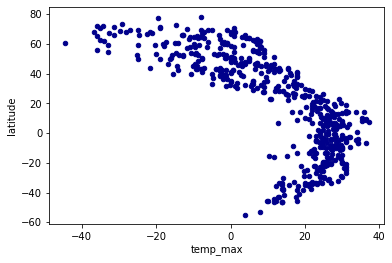

In [177]:
tempVlat = clean_data.plot.scatter(x = "temp_max",
                                    y = "latitude",
                                    c = "DarkBlue")
print("The temperature is directly related to the equator; the farther north or south away a city is from the equator, the average temperature is colder.")

## Latitude vs. Humidity Plot

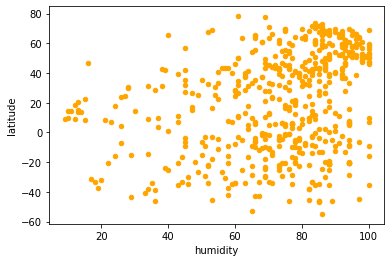

In [178]:
humVlat = clean_data.plot.scatter(x = "humidity",
                                   y = "latitude",
                                   c = "orange")


## Latitude vs. Cloudiness Plot

OBSERVATION: Humidity tends to average at approximately 0, 20, 40, 70 and 100 percentages.


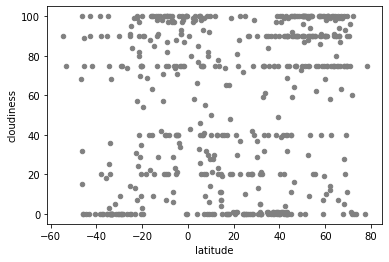

In [179]:

CloudyVlat = clean_data.plot.scatter(x = "latitude",
                                    y = "cloudiness",
                                    c = "gray")
print("OBSERVATION: Humidity tends to average at approximately 0, 20, 40, 70 and 100 percentages.")

## Latitude vs. Wind Speed Plot

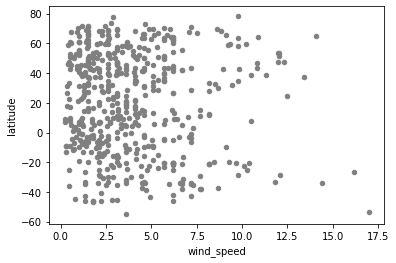

In [180]:
windVlat = clean_data.plot.scatter(x = "wind_speed",
                                    y = "latitude",
                                    c = "gray")

## Linear Regression

In [181]:
#created a new df for cities in northern hemisphere (where latitude is >0)
northern_df = clean_data.loc[clean_data["latitude"]>0]
northern_df.head()

,city,temp_max,humidity,wind_speed,cloudiness,country,date,longitude,latitude
0,Emba,-8.70,82,2.27,0,KZ,1608043532,58.14,48.83
1,Port Blair,27.20,84,4.60,100,IN,1608043389,92.75,11.67
4,Kathu,30.00,94,0.50,20,TH,1608043536,98.33,7.92
5,Karasjok,-1.00,80,3.10,75,NO,1608043537,25.51,69.47
8,Butaritari,27.61,79,7.27,98,KI,1608043540,172.79,3.07


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

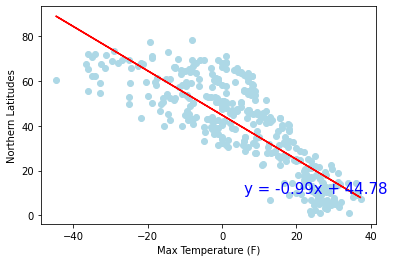

The r-value is: -0.8341133544897493
OBSERVATION: This scatter plot demonstrates max temperature compared to northern latitudes. Temperatures in the northern hemisphere have a strong negative correlation as latitude increases.  This can be confirmed by the correlation coefficient of -0.83


In [200]:
#created x and y axes using northen latitude and associated humidity data
north_x = northern_df["temp_max"]
north_y = northern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(north_x, north_y, color = 'lightblue')
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("OBSERVATION: This scatter plot demonstrates max temperature compared to northern latitudes. Temperatures in the northern hemisphere have a strong negative correlation as latitude increases.  This can be confirmed by the correlation coefficient of -0.83")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [183]:
#created a new df for cities in southern hemisphere (where latitude is <0)
southern_df = clean_data.loc[clean_data["latitude"]<0]
southern_df.head()

,city,temp_max,humidity,wind_speed,cloudiness,country,date,longitude,latitude
2,Atuona,25.81,77,9.11,7,PF,1608043534,-139.03,-9.80
3,Bluff,13.89,85,1.79,68,NZ,1608043535,168.33,-46.60
6,Pisco,21.00,83,2.10,90,PE,1608043481,-76.22,-13.70
7,Tapes,26.57,57,2.31,0,BR,1608043539,-51.40,-30.67
11,Touros,31.00,62,6.20,40,BR,1608043544,-35.46,-5.20


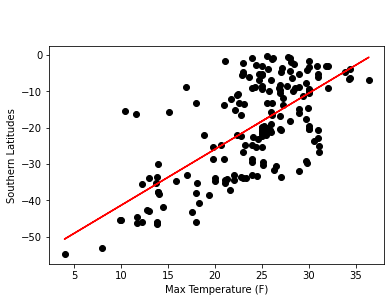

The r-value is: 0.68071618066635
OBSERVATION: Temperatures in the southern hemisphere have a moderate to strong positive correlation as latitude increases as evidenced by the correlation coefficient of 0.68


In [201]:
#created x and y axes using northen latitude and associated humidity data
south_x = southern_df["temp_max"]
south_y = southern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(south_x, south_y, color = 'black')
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("OBSERVATION: Temperatures in the southern hemisphere have a moderate to strong positive correlation as latitude increases as evidenced by the correlation coefficient of 0.68")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

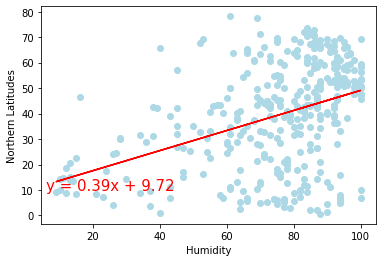

The r-value is: 0.3971811034439119
OBSERVATION: Temperatures in the northern hemisphere have a strong negative correlation as latitude increases


In [184]:
north_x = northern_df["humidity"]
north_y = northern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(north_x, north_y, color = 'lightblue')
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Humidity")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("OBSERVATION: Temperatures in the northern hemisphere have a a mild negative correlation as latitude increases.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

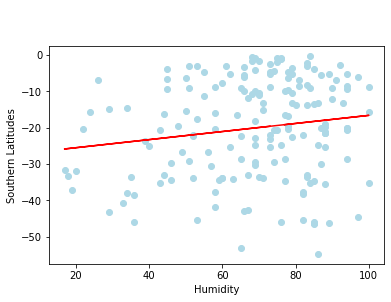

The r-value is: 0.15868869814073375
OBSERVATION: There appears to be no correlation to humidity versus southern latitude as the R-value is close to 0


In [211]:
south_x = southern_df["humidity"]
south_y = southern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(south_x, south_y, color = 'lightblue')
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Humidity")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("OBSERVATION: There appears to be no correlation to humidity versus southern latitude as the R-value is close to 0")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

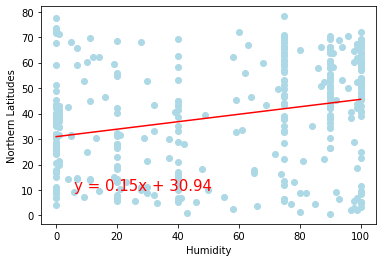

The r-value is: 0.2742638977402449
There is a mild, positive correlation of humidity and northern latitude.


In [210]:
north_x = northern_df["cloudiness"]
north_y = northern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(north_x, north_y, color = 'lightblue')
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Humidity")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("There is a mild, positive correlation of humidity and northern latitude.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

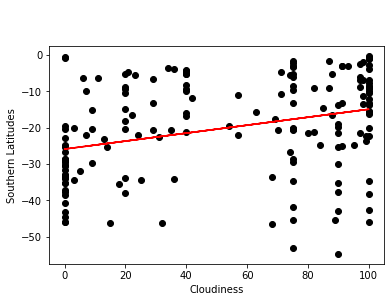

The r-value is: 0.3177045738164538
OBSERVATION: There is a mildly positive correlation between cloudiness and latitude in the southern hemisphere, as evidenced by an R-value of ~0.32


In [206]:
south_x = southern_df["cloudiness"]
south_y = southern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(south_x, south_y, color = 'black')
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel("Cloudiness")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("OBSERVATION: There is a mildly positive correlation between cloudiness and latitude in the southern hemisphere, as evidenced by an R-value of ~0.32")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

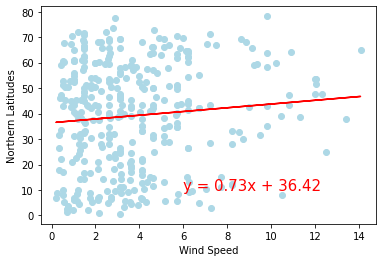

The r-value is: 0.0979528577568589


In [189]:
north_x = northern_df["wind_speed"]
north_y = northern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(north_x, north_y, color = 'lightblue')
plt.plot(north_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

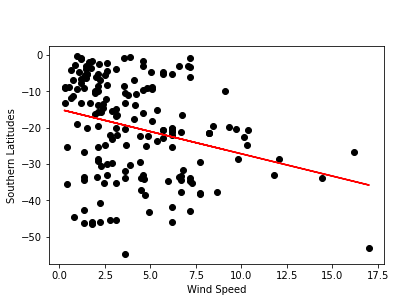

The r-value is: -0.2753573614263376
OBSERVATION: There is a very mild, negative correlation of wind speed and latitude in the southern hemisphere as evidenced by an R-value of -0.28


In [209]:
south_x = southern_df["wind_speed"]
south_y = southern_df["latitude"]
#calculate regression using scipy.stats linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept
#calculate regression line using standard equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot data
plt.scatter(south_x, south_y, color = 'black')
plt.plot(south_x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Wind Speed")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)
print("The r-value is:", rvalue)
print("OBSERVATION: There is a very mild, negative correlation of wind speed and latitude in the southern hemisphere as evidenced by an R-value of -0.28")

In [191]:
clean_data.to_csv('../weather.csv',index = False, header = True)